# **Deforum Stable Diffusion (v0.7.1)**
⚠️ **NOTICE: This project is no longer maintained.** ⚠️
This repository is no longer actively maintained or updated. Users are advised to find alternative solutions or fork the project if they wish to continue development.

In [1]:
!git clone https://github.com/rewbs/sd-parseq /content/parseq

Cloning into '/content/parseq'...
remote: Enumerating objects: 3148, done.
remote: Counting objects: 100% (589/589), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 3148 (delta 479), reused 523 (delta 424), pack-reused 2559 (from 1)
Receiving objects: 100% (3148/3148), 8.05 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (2392/2392), done.


In [2]:
# 2. Installer manuellement les dépendances nécessaires
!pip install librosa pandas numpy matplotlib


In [3]:
from google.colab import files

uploaded = files.upload()
# Ton fichier sera disponible dans /content/nom_du_fichier


Saving Bsow_-_Sekpata__(Audio_officielle).mp3 to Bsow_-_Sekpata__(Audio_officielle).mp3


In [11]:
import librosa
import pandas as pd

audio_path = "/content/Bsow_-_Sekpata__(Audio_officielle).mp3"

y, sr = librosa.load(audio_path)
mfcc = librosa.feature.mfcc(y=y, sr=sr)

df = pd.DataFrame(mfcc)
df.to_csv("/content/drive/MyDrive/deforum_project/audio_features.csv")
df.head()


,0,1,2,3,4,5,6,7,8,9,...,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355
0,-221.755310,-39.820992,-17.791586,-81.343765,-144.273987,-168.691559,-171.119537,-176.582306,-189.610657,-194.508179,...,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781,-475.869781
1,10.919581,21.476622,20.663792,4.007012,-35.838982,-41.941116,-32.231308,-27.008236,-20.859907,-17.089012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-58.018085,-46.261421,-38.493858,-35.779140,-78.306671,-105.259071,-108.491234,-108.198441,-106.801048,-105.810730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-16.934307,-2.894177,-0.074601,-5.613297,-28.497236,-47.341824,-47.195915,-49.944813,-55.366173,-55.974762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-41.402512,-31.983587,-27.444859,-25.682966,-33.089218,-48.748108,-53.612789,-57.636314,-54.913830,-56.515785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
import os
os.makedirs("/content/drive/MyDrive/deforum_project", exist_ok=True)


<ipython-input-17-dd0fbe108dc4>:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo_val = float(tempo)  # assure que tempo est un float


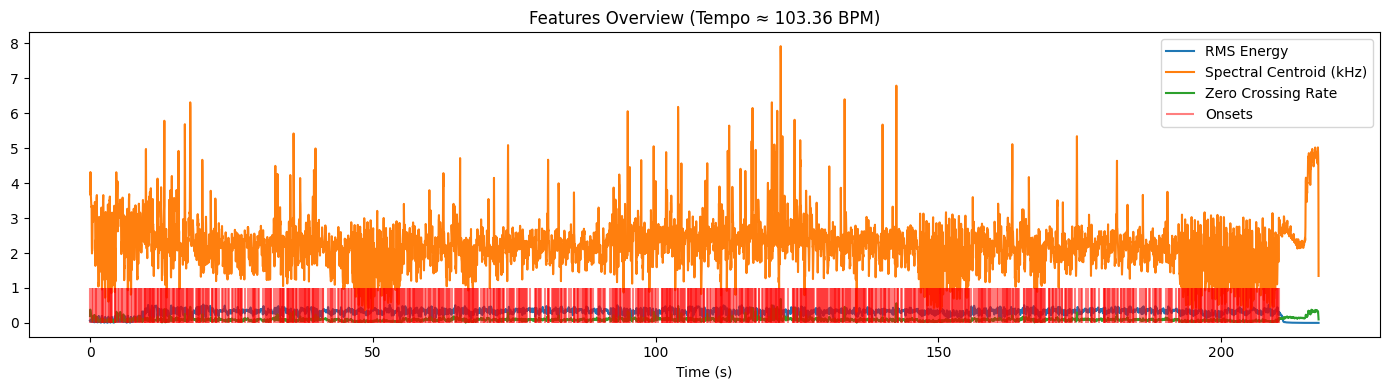

In [17]:
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Charger l'audio
audio_path = "/content/Bsow_-_Sekpata__(Audio_officielle).mp3"
y, sr = librosa.load(audio_path)

# 1. MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# 2. RMS (énergie)
rms = librosa.feature.rms(y=y)

# 3. Tempo (BPM)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

# 4. Chromagram (hauteur/tonalité)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# 5. Spectral centroid (brillance)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# 6. Zero Crossing Rate (voix/impact percussif)
zcr = librosa.feature.zero_crossing_rate(y)

# 7. Onsets (détection d’impulsions)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# 🧠 Créer un dataframe synchronisé dans le temps
frames = mfcc.shape[1]
times = librosa.frames_to_time(np.arange(frames), sr=sr)

df = pd.DataFrame({
    "time": times,
    "rms": rms[0][:frames],
    "centroid": centroid[0][:frames],
    "zcr": zcr[0][:frames]
})

# Ajoute tempo et onsets comme info globale
df["tempo"] = [tempo] * len(df)  # répéter la valeur unique
df["onset"] = 0
df.loc[onset_frames, "onset"] = 1


# Sauvegarde
os.makedirs("/content/drive/MyDrive/deforum_project", exist_ok=True)
df.to_csv("/content/drive/MyDrive/deforum_project/audio_features_extended.csv", index=False)

# Visualisation simple
plt.figure(figsize=(14, 4))
plt.plot(df["time"], df["rms"], label="RMS Energy")
plt.plot(df["time"], df["centroid"] / 1000, label="Spectral Centroid (kHz)")
plt.plot(df["time"], df["zcr"], label="Zero Crossing Rate")
plt.vlines(onset_times, ymin=0, ymax=1, color='r', alpha=0.5, label="Onsets")
plt.legend()
tempo_val = float(tempo)  # assure que tempo est un float
plt.title(f"Features Overview (Tempo ≈ {tempo_val:.2f} BPM)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()


In [ ]:
import librosa
import numpy as np

# --- ⚙️ PARAMÈTRES ---
audio_path = "/content/Bsow_-_Sekpata__(Audio_officielle).mp3"  # 🔁 Remplace si nécessaire
fps = 12  # Doit correspondre à ffmpeg_fps
prompt_1 = "Young African people dancing joyfully, watercolor, Afrobeat, sunny"
prompt_2 = "Funny animated village scene, vivid colors, exaggerated dance, Afrobeat"

# --- 🎵 EXTRACTION DES ONSETS ---
y, sr = librosa.load(audio_path)
onset_frames = librosa.onset.onset_detect(y=y, sr=sr, backtrack=True)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)
frame_numbers = [int(t * fps) for t in onset_times]

print(f"{len(frame_numbers)} beats detected: {frame_numbers}")

# --- 🔁 ZOOM SYNCHRONISÉ ---
zoom_schedule = "0:(1.0)"
for f in frame_numbers:
    zoom_schedule += f",{f}:(1.15),{f+1}:(1.0)"

# --- 🎨 PROMPTS DYNAMIQUES ---
prompts = {}
for i, f in enumerate(frame_numbers):
    if i % 2 == 0:
        prompts[f] = prompt_1
    else:
        prompts[f] = prompt_2

# --- 📝 AFFICHAGE DES PARAMÈTRES GÉNÉRÉS ---
print("\n🔍 Zoom schedule:\n", zoom_schedule)
print("\n🎨 Prompts:\n", prompts)


In [8]:
!pip install librosa


In [21]:
fps = 12  # Le même que dans `ffmpeg_fps`
onset_frames = [int(t * fps) for t in onset_times]


In [4]:
#@markdown **NVIDIA GPU**
import subprocess, os, sys
sub_p_res = subprocess.run(['nvidia-smi', '--query-gpu=name,memory.total,memory.free', '--format=csv,noheader'], stdout=subprocess.PIPE).stdout.decode('utf-8')
print(f"{sub_p_res[:-1]}")

Tesla T4, 15360 MiB, 15095 MiB


# Setup

In [20]:
import time  # ⬅️ nécessaire pour utiliser time.time(), sleep(), etc.
def setup_environment():
    try:
        ipy = get_ipython()
    except:
        ipy = 'could not get_ipython'

    if 'google.colab' in str(ipy):
        start_time = time.time()

        # ⚠️ Fixer une version compatible de numpy
        print("..installing numpy==1.23.5 (compat fix for scikit-image)")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'numpy==1.23.5'])

        packages = [
            'xformers',
            'einops==0.4.1 pytorch-lightning==2.3.3 torchdiffeq==0.2.3 torchsde==0.2.6',
            'ftfy timm transformers open-clip-torch==2.24.0 omegaconf torchmetrics==0.11.4',
            'safetensors kornia accelerate jsonmerge matplotlib resize-right',
            'scikit-learn numpngw pydantic scikit-image==0.19.3'
        ]
        for package in packages:
            print(f"..installing {package}")
            subprocess.check_call([sys.executable, '-m', 'pip', 'install'] + package.split())

        if not os.path.exists("deforum-stable-diffusion"):
            subprocess.check_call(['git', 'clone', 'https://github.com/deforum-art/deforum-stable-diffusion.git'])
        else:
            print(f"..deforum-stable-diffusion already exists")

        # Fix for k_diffusion init file
        with open('deforum-stable-diffusion/src/k_diffusion/__init__.py', 'w') as f:
            f.write('')

        sys.path.extend(['deforum-stable-diffusion/', 'deforum-stable-diffusion/src'])

        end_time = time.time()
        print(f"..environment set up in {end_time-start_time:.0f} seconds")
    else:
        sys.path.extend(['src'])
        print("..skipping setup")


In [ ]:
#@markdown **Path Setup**

def PathSetup():
    models_path = "models" #@param {type:"string"}
    configs_path = "configs" #@param {type:"string"}
    output_path = "outputs" #@param {type:"string"}
    mount_google_drive = True #@param {type:"boolean"}
    models_path_gdrive = "/content/drive/MyDrive/AI/models" #@param {type:"string"}
    output_path_gdrive = "/content/drive/MyDrive/AI/StableDiffusion" #@param {type:"string"}
    return locals()

root = SimpleNamespace(**PathSetup())
root.models_path, root.output_path = get_model_output_paths(root)

In [ ]:
#@markdown **Model Setup**

def ModelSetup():
    map_location = "cuda" #@param ["cpu", "cuda"]
    model_config = "v1-inference.yaml" #@param ["custom","v2-inference.yaml","v2-inference-v.yaml","v1-inference.yaml"]
    model_checkpoint =  "Protogen_V2.2.ckpt" #@param ["custom","v2-1_768-ema-pruned.ckpt","v2-1_512-ema-pruned.ckpt","768-v-ema.ckpt","512-base-ema.ckpt","Protogen_V2.2.ckpt","v1-5-pruned.ckpt","v1-5-pruned-emaonly.ckpt","sd-v1-4-full-ema.ckpt","sd-v1-4.ckpt","sd-v1-3-full-ema.ckpt","sd-v1-3.ckpt","sd-v1-2-full-ema.ckpt","sd-v1-2.ckpt","sd-v1-1-full-ema.ckpt","sd-v1-1.ckpt", "robo-diffusion-v1.ckpt","wd-v1-3-float16.ckpt"]
    custom_config_path = "" #@param {type:"string"}
    custom_checkpoint_path = "" #@param {type:"string"}
    return locals()

root.__dict__.update(ModelSetup())
root.model, root.device = load_model(root, load_on_run_all=True, check_sha256=True, map_location=root.map_location)

# Settings

In [ ]:
def DeforumAnimArgs():

    #@markdown ####**Animation:**
    animation_mode = 'None' #@param ['None', '2D', '3D', 'Video Input', 'Interpolation'] {type:'string'}
    max_frames = 1000 #@param {type:"number"}
    border = 'replicate' #@param ['wrap', 'replicate'] {type:'string'}

    #@markdown ####**Motion Parameters:**
    angle = "0:(0)"#@param {type:"string"}
    zoom = "0:(1.04)"#@param {type:"string"}
    translation_x = "0:(10*sin(2*3.14*t/10))"#@param {type:"string"}
    translation_y = "0:(0)"#@param {type:"string"}
    translation_z = "0:(10)"#@param {type:"string"}
    rotation_3d_x = "0:(0)"#@param {type:"string"}
    rotation_3d_y = "0:(0)"#@param {type:"string"}
    rotation_3d_z = "0:(0)"#@param {type:"string"}
    flip_2d_perspective = False #@param {type:"boolean"}
    perspective_flip_theta = "0:(0)"#@param {type:"string"}
    perspective_flip_phi = "0:(t%15)"#@param {type:"string"}
    perspective_flip_gamma = "0:(0)"#@param {type:"string"}
    perspective_flip_fv = "0:(53)"#@param {type:"string"}
    noise_schedule = "0: (0.02)"#@param {type:"string"}
    strength_schedule = "0: (0.65)"#@param {type:"string"}
    contrast_schedule = "0: (1.0)"#@param {type:"string"}
    hybrid_comp_alpha_schedule = "0:(1)" #@param {type:"string"}
    hybrid_comp_mask_blend_alpha_schedule = "0:(0.5)" #@param {type:"string"}
    hybrid_comp_mask_contrast_schedule = "0:(1)" #@param {type:"string"}
    hybrid_comp_mask_auto_contrast_cutoff_high_schedule =  "0:(100)" #@param {type:"string"}
    hybrid_comp_mask_auto_contrast_cutoff_low_schedule =  "0:(0)" #@param {type:"string"}

    #@markdown ####**Sampler Scheduling:**
    enable_schedule_samplers = False #@param {type:"boolean"}
    sampler_schedule = "0:('euler'),10:('dpm2'),20:('dpm2_ancestral'),30:('heun'),40:('euler'),50:('euler_ancestral'),60:('dpm_fast'),70:('dpm_adaptive'),80:('dpmpp_2s_a'),90:('dpmpp_2m')" #@param {type:"string"}

    #@markdown ####**Unsharp mask (anti-blur) Parameters:**
    kernel_schedule = "0: (5)"#@param {type:"string"}
    sigma_schedule = "0: (1.0)"#@param {type:"string"}
    amount_schedule = "0: (0.2)"#@param {type:"string"}
    threshold_schedule = "0: (0.0)"#@param {type:"string"}

    #@markdown ####**Coherence:**
    color_coherence = 'Match Frame 0 LAB' #@param ['None', 'Match Frame 0 HSV', 'Match Frame 0 LAB', 'Match Frame 0 RGB', 'Video Input'] {type:'string'}
    color_coherence_video_every_N_frames = 1 #@param {type:"integer"}
    color_force_grayscale = False #@param {type:"boolean"}
    diffusion_cadence = '1' #@param ['1','2','3','4','5','6','7','8'] {type:'string'}

    #@markdown ####**3D Depth Warping:**
    use_depth_warping = True #@param {type:"boolean"}
    midas_weight = 0.3#@param {type:"number"}
    near_plane = 200
    far_plane = 10000
    fov = 40#@param {type:"number"}
    padding_mode = 'border'#@param ['border', 'reflection', 'zeros'] {type:'string'}
    sampling_mode = 'bicubic'#@param ['bicubic', 'bilinear', 'nearest'] {type:'string'}
    save_depth_maps = False #@param {type:"boolean"}

    #@markdown ####**Video Input:**
    video_init_path ='/content/video_in.mp4'#@param {type:"string"}
    extract_nth_frame = 1#@param {type:"number"}
    overwrite_extracted_frames = True #@param {type:"boolean"}
    use_mask_video = False #@param {type:"boolean"}
    video_mask_path ='/content/video_in.mp4'#@param {type:"string"}

    #@markdown ####**Hybrid Video for 2D/3D Animation Mode:**
    hybrid_generate_inputframes = False #@param {type:"boolean"}
    hybrid_use_first_frame_as_init_image = True #@param {type:"boolean"}
    hybrid_motion = "None" #@param ['None','Optical Flow','Perspective','Affine']
    hybrid_motion_use_prev_img = False #@param {type:"boolean"}
    hybrid_flow_method = "DIS Medium" #@param ['DenseRLOF','DIS Medium','Farneback','SF']
    hybrid_composite = False #@param {type:"boolean"}
    hybrid_comp_mask_type = "None" #@param ['None', 'Depth', 'Video Depth', 'Blend', 'Difference']
    hybrid_comp_mask_inverse = False #@param {type:"boolean"}
    hybrid_comp_mask_equalize = "None" #@param  ['None','Before','After','Both']
    hybrid_comp_mask_auto_contrast = False #@param {type:"boolean"}
    hybrid_comp_save_extra_frames = False #@param {type:"boolean"}
    hybrid_use_video_as_mse_image = False #@param {type:"boolean"}

    #@markdown ####**Interpolation:**
    interpolate_key_frames = False #@param {type:"boolean"}
    interpolate_x_frames = 20 #@param {type:"number"}

    #@markdown ####**Resume Animation:**
    resume_from_timestring = False #@param {type:"boolean"}
    resume_timestring = "20220829210106" #@param {type:"string"}

    return locals()

In [ ]:
# prompts
prompts = {
    0: "A vibrant 2D animation of young African people dancing joyfully in a colorful market, wearing bright clothes, with joyful and exaggerated movements, upbeat and playful style, sunny African village background, Afrobeat rhythm, watercolor texture, vivid colors, cartoonish style.",
    10: "A funny animated scene of people chatting, laughing, and enjoying life in an African village, comical style, exaggerated features, bright fabrics, lively expressions, tropical trees and a busy street, dance moves to rhythmic Afrobeat music, bright sunshine.",
}

neg_prompts = {
    0: "mountains, gloomy, dark, horror, sad, rainy, winter, frozen",
}


# can be a string, list, or dictionary
#prompts = [
#    "a beautiful lake by Asher Brown Durand, trending on Artstation",
#    "a beautiful portrait of a woman by Artgerm, trending on Artstation",
#]
#prompts = "a beautiful lake by Asher Brown Durand, trending on Artstation"

In [ ]:
#@markdown **Load Settings**
override_settings_with_file = False #@param {type:"boolean"}
settings_file = "custom" #@param ["custom", "512x512_aesthetic_0.json","512x512_aesthetic_1.json","512x512_colormatch_0.json","512x512_colormatch_1.json","512x512_colormatch_2.json","512x512_colormatch_3.json"]
custom_settings_file = "/content/drive/MyDrive/Settings.txt"#@param {type:"string"}

def DeforumArgs():
    #@markdown **Image Settings**
    W = 512 #@param
    H = 512 #@param
    W, H = map(lambda x: x - x % 64, (W, H))  # resize to integer multiple of 64
    bit_depth_output = 8 #@param [8, 16, 32] {type:"raw"}

    #@markdown **Sampling Settings**
    seed = -1 #@param
    sampler = 'euler_ancestral' #@param ["klms","dpm2","dpm2_ancestral","heun","euler","euler_ancestral","plms", "ddim", "dpm_fast", "dpm_adaptive", "dpmpp_2s_a", "dpmpp_2m"]
    steps = 50 #@param
    scale = 7 #@param
    ddim_eta = 0.0 #@param
    dynamic_threshold = None
    static_threshold = None

    #@markdown **Save & Display Settings**
    save_samples = True #@param {type:"boolean"}
    save_settings = True #@param {type:"boolean"}
    display_samples = True #@param {type:"boolean"}
    save_sample_per_step = False #@param {type:"boolean"}
    show_sample_per_step = False #@param {type:"boolean"}

    #@markdown **Batch Settings**
    n_batch = 1 #@param
    n_samples = 1 #@param
    batch_name = "StableFun" #@param {type:"string"}
    filename_format = "{timestring}_{index}_{prompt}.png" #@param ["{timestring}_{index}_{seed}.png","{timestring}_{index}_{prompt}.png"]
    seed_behavior = "iter" #@param ["iter","fixed","random","ladder","alternate"]
    seed_iter_N = 1 #@param {type:'integer'}
    make_grid = False #@param {type:"boolean"}
    grid_rows = 2 #@param
    outdir = get_output_folder(root.output_path, batch_name)

    #@markdown **Init Settings**
    use_init = False #@param {type:"boolean"}
    strength = 0.65 #@param {type:"number"}
    strength_0_no_init = True # Set the strength to 0 automatically when no init image is used
    init_image = "https://cdn.pixabay.com/photo/2022/07/30/13/10/green-longhorn-beetle-7353749_1280.jpg" #@param {type:"string"}
    add_init_noise = False #@param {type:"boolean"}
    init_noise = 0.01 #@param
    # Whiter areas of the mask are areas that change more
    use_mask = False #@param {type:"boolean"}
    use_alpha_as_mask = False # use the alpha channel of the init image as the mask
    mask_file = "https://www.filterforge.com/wiki/images/archive/b/b7/20080927223728%21Polygonal_gradient_thumb.jpg" #@param {type:"string"}
    invert_mask = False #@param {type:"boolean"}
    # Adjust mask image, 1.0 is no adjustment. Should be positive numbers.
    mask_brightness_adjust = 1.0  #@param {type:"number"}
    mask_contrast_adjust = 1.0  #@param {type:"number"}
    # Overlay the masked image at the end of the generation so it does not get degraded by encoding and decoding
    overlay_mask = True  # {type:"boolean"}
    # Blur edges of final overlay mask, if used. Minimum = 0 (no blur)
    mask_overlay_blur = 5 # {type:"number"}

    #@markdown **Exposure/Contrast Conditional Settings**
    mean_scale = 0 #@param {type:"number"}
    var_scale = 0 #@param {type:"number"}
    exposure_scale = 0 #@param {type:"number"}
    exposure_target = 0.5 #@param {type:"number"}

    #@markdown **Color Match Conditional Settings**
    colormatch_scale = 0 #@param {type:"number"}
    colormatch_image = "https://www.saasdesign.io/wp-content/uploads/2021/02/palette-3-min-980x588.png" #@param {type:"string"}
    colormatch_n_colors = 4 #@param {type:"number"}
    ignore_sat_weight = 0 #@param {type:"number"}

    #@markdown **CLIP\Aesthetics Conditional Settings**
    clip_name = 'ViT-L/14' #@param ['ViT-L/14', 'ViT-L/14@336px', 'ViT-B/16', 'ViT-B/32']
    clip_scale = 0 #@param {type:"number"}
    aesthetics_scale = 0 #@param {type:"number"}
    cutn = 1 #@param {type:"number"}
    cut_pow = 0.0001 #@param {type:"number"}

    #@markdown **Other Conditional Settings**
    init_mse_scale = 0 #@param {type:"number"}
    init_mse_image = "https://cdn.pixabay.com/photo/2022/07/30/13/10/green-longhorn-beetle-7353749_1280.jpg" #@param {type:"string"}
    blue_scale = 0 #@param {type:"number"}

    #@markdown **Conditional Gradient Settings**
    gradient_wrt = 'x0_pred' #@param ["x", "x0_pred"]
    gradient_add_to = 'both' #@param ["cond", "uncond", "both"]
    decode_method = 'linear' #@param ["autoencoder","linear"]
    grad_threshold_type = 'dynamic' #@param ["dynamic", "static", "mean", "schedule"]
    clamp_grad_threshold = 0.2 #@param {type:"number"}
    clamp_start = 0.2 #@param
    clamp_stop = 0.01 #@param
    grad_inject_timing = list(range(1,10)) #@param

    #@markdown **Speed vs VRAM Settings**
    cond_uncond_sync = True #@param {type:"boolean"}
    precision = 'autocast'
    C = 4
    f = 8

    cond_prompt = ""
    cond_prompts = ""
    uncond_prompt = ""
    uncond_prompts = ""
    timestring = ""
    init_latent = None
    init_sample = None
    init_sample_raw = None
    mask_sample = None
    init_c = None
    seed_internal = 0

    return locals()

args_dict = DeforumArgs()
anim_args_dict = DeforumAnimArgs()

if override_settings_with_file:
    load_args(args_dict, anim_args_dict, settings_file, custom_settings_file, verbose=False)

args = SimpleNamespace(**args_dict)
anim_args = SimpleNamespace(**anim_args_dict)

args.timestring = time.strftime('%Y%m%d%H%M%S')
args.strength = max(0.0, min(1.0, args.strength))

# Load clip model if using clip guidance
if (args.clip_scale > 0) or (args.aesthetics_scale > 0):
    root.clip_model = clip.load(args.clip_name, jit=False)[0].eval().requires_grad_(False).to(root.device)
    if (args.aesthetics_scale > 0):
        root.aesthetics_model = load_aesthetics_model(args, root)

if args.seed == -1:
    args.seed = random.randint(0, 2**32 - 1)
if not args.use_init:
    args.init_image = None
if args.sampler == 'plms' and (args.use_init or anim_args.animation_mode != 'None'):
    print(f"Init images aren't supported with PLMS yet, switching to KLMS")
    args.sampler = 'klms'
if args.sampler != 'ddim':
    args.ddim_eta = 0

if anim_args.animation_mode == 'None':
    anim_args.max_frames = 1
elif anim_args.animation_mode == 'Video Input':
    args.use_init = True

# clean up unused memory
gc.collect()
torch.cuda.empty_cache()

# get prompts
cond, uncond = Prompts(prompt=prompts,neg_prompt=neg_prompts).as_dict()

# dispatch to appropriate renderer
if anim_args.animation_mode == '2D' or anim_args.animation_mode == '3D':
    render_animation(root, anim_args, args, cond, uncond)
elif anim_args.animation_mode == 'Video Input':
    render_input_video(root, anim_args, args, cond, uncond)
elif anim_args.animation_mode == 'Interpolation':
    render_interpolation(root, anim_args, args, cond, uncond)
else:
    render_image_batch(root, args, cond, uncond)

# Create Video From Frames

In [ ]:
#@markdown **New Version**
skip_video_for_run_all = True #@param {type: 'boolean'}
create_gif = False #@param {type: 'boolean'}

if skip_video_for_run_all == True:
    print('Skipping video creation, uncheck skip_video_for_run_all if you want to run it')
else:

    from helpers.ffmpeg_helpers import get_extension_maxframes, get_auto_outdir_timestring, get_ffmpeg_path, make_mp4_ffmpeg, make_gif_ffmpeg, patrol_cycle

    def ffmpegArgs():
        ffmpeg_mode = "auto" #@param ["auto","manual","timestring"]
        ffmpeg_outdir = "" #@param {type:"string"}
        ffmpeg_timestring = "" #@param {type:"string"}
        ffmpeg_image_path = "" #@param {type:"string"}
        ffmpeg_mp4_path = "" #@param {type:"string"}
        ffmpeg_gif_path = "" #@param {type:"string"}
        ffmpeg_extension = "png" #@param {type:"string"}
        ffmpeg_maxframes = 200 #@param
        ffmpeg_fps = 12 #@param

        # determine auto paths
        if ffmpeg_mode == 'auto':
            ffmpeg_outdir, ffmpeg_timestring = get_auto_outdir_timestring(args,ffmpeg_mode)
        if ffmpeg_mode in ["auto","timestring"]:
            ffmpeg_extension, ffmpeg_maxframes = get_extension_maxframes(args,ffmpeg_outdir,ffmpeg_timestring)
            ffmpeg_image_path, ffmpeg_mp4_path, ffmpeg_gif_path = get_ffmpeg_path(ffmpeg_outdir, ffmpeg_timestring, ffmpeg_extension)
        return locals()

    ffmpeg_args_dict = ffmpegArgs()
    ffmpeg_args = SimpleNamespace(**ffmpeg_args_dict)
    make_mp4_ffmpeg(ffmpeg_args, display_ffmpeg=True, debug=False)
    if create_gif:
        make_gif_ffmpeg(ffmpeg_args, debug=False)
    #patrol_cycle(args,ffmpeg_args)

# Disconnect Runtime

In [ ]:
skip_disconnect_for_run_all = True #@param {type: 'boolean'}

if skip_disconnect_for_run_all == True:
    print('Skipping disconnect, uncheck skip_disconnect_for_run_all if you want to run it')
else:
    from google.colab import runtime
    runtime.unassign()